In [0]:
import os, cv2
from PIL import Image, ImageOps
import pickle
import imutils
from tqdm import tqdm
from time import *
import numpy as np
import math
import h5py
import timeit
import pandas as pd
from random import shuffle
import matplotlib.pyplot as plt
import keras.utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import backend as K
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing 
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

import glob

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Setting the root directory for the user

In [0]:
check_dir = os.getcwd() + '/drive/My Drive/'
if 'Academics' in os.listdir(check_dir): # Niraj drive
  root_dir = '/content/drive/My Drive/Academics/Sem1/682/'
else: # Anirudh drive
  root_dir = '/content/drive/My Drive/'

In [0]:
dataset_path = root_dir + 'CS682 Project/Final/Dataset/data_128/'
results_path = root_dir + 'CS682 Project/Final/Results/'
models_path = root_dir + 'CS682 Project/Final/Models/'

Fetching stored training histories

In [0]:
histories = glob.glob(f'{results_path}*.h5')[:]

In [0]:
histories

['/content/drive/My Drive/CS682 Project/Final/Results/GU_Adam(5e-5).h5',
 '/content/drive/My Drive/CS682 Project/Final/Results/LU_Adam(8e-5).h5',
 '/content/drive/My Drive/CS682 Project/Final/Results/LU_Adam(9e-5).h5',
 '/content/drive/My Drive/CS682 Project/Final/Results/LU_Adam(3e-5).h5',
 '/content/drive/My Drive/CS682 Project/Final/Results/LU_Adam(1e-5).h5',
 '/content/drive/My Drive/CS682 Project/Final/Results/LU_Adam(2e-5).h5',
 '/content/drive/My Drive/CS682 Project/Final/Results/LU_Adam(7e-5).h5',
 '/content/drive/My Drive/CS682 Project/Final/Results/LU_Adam(4e-5).h5',
 '/content/drive/My Drive/CS682 Project/Final/Results/LU_Adam(6e-5).h5']

In [0]:
lr_1, lr_2, lr_3, lr_4, lr_5, lr_6, lr_7, lr_8, lr_9 = {}, {}, {}, {}, {}, {}, {}, {}, {}

hf = h5py.File(results_path + "LU_Adam(1e-5).h5", "r")
lr_1['acc'] = list(hf['acc'])
lr_1['val_acc'] = list(hf['val_acc'])
lr_1['loss'] = list(hf['loss'])
lr_1['val_loss'] = list(hf['val_loss'])
hf.close()

hf = h5py.File(results_path + "LU_Adam(2e-5).h5", "r")
lr_2['acc'] = list(hf['acc'])
lr_2['val_acc'] = list(hf['val_acc'])
lr_2['loss'] = list(hf['loss'])
lr_2['val_loss'] = list(hf['val_loss'])
hf.close()

hf = h5py.File(results_path + "LU_Adam(3e-5).h5", "r")
lr_3['acc'] = list(hf['acc'])
lr_3['val_acc'] = list(hf['val_acc'])
lr_3['loss'] = list(hf['loss'])
lr_3['val_loss'] = list(hf['val_loss'])
hf.close()

hf = h5py.File(results_path + "LU_Adam(4e-5).h5", "r")
lr_4['acc'] = list(hf['acc'])
lr_4['val_acc'] = list(hf['val_acc'])
lr_4['loss'] = list(hf['loss'])
lr_4['val_loss'] = list(hf['val_loss'])
hf.close()

hf = h5py.File(results_path + "GU_Adam(5e-5).h5", "r")
lr_5['acc'] = list(hf['acc'])
lr_5['val_acc'] = list(hf['val_acc'])
lr_5['loss'] = list(hf['loss'])
lr_5['val_loss'] = list(hf['val_loss'])
hf.close()

hf = h5py.File(results_path + "LU_Adam(6e-5).h5", "r")
lr_6['acc'] = list(hf['acc'])
lr_6['val_acc'] = list(hf['val_acc'])
lr_6['loss'] = list(hf['loss'])
lr_6['val_loss'] = list(hf['val_loss'])
hf.close()

hf = h5py.File(results_path + "LU_Adam(7e-5).h5", "r")
lr_7['acc'] = list(hf['acc'])
lr_7['val_acc'] = list(hf['val_acc'])
lr_7['loss'] = list(hf['loss'])
lr_7['val_loss'] = list(hf['val_loss'])
hf.close()

hf = h5py.File(results_path + "LU_Adam(8e-5).h5", "r")
lr_8['acc'] = list(hf['acc'])
lr_8['val_acc'] = list(hf['val_acc'])
lr_8['loss'] = list(hf['loss'])
lr_8['val_loss'] = list(hf['val_loss'])
hf.close()

hf = h5py.File(results_path + "LU_Adam(9e-5).h5", "r")
lr_9['acc'] = list(hf['acc'])
lr_9['val_acc'] = list(hf['val_acc'])
lr_9['loss'] = list(hf['loss'])
lr_9['val_loss'] = list(hf['val_loss'])
hf.close()

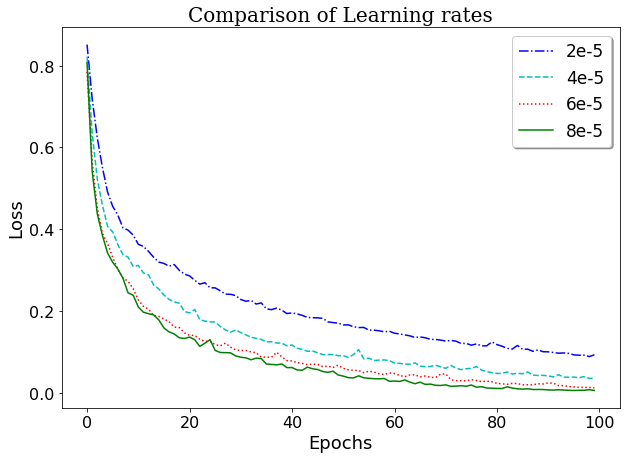

In [0]:
title_font = {'family':'fantasy', 'size':'16', 'color':'black', 'weight':'normal', 
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'family':'fantasy', 'size':'14'}

plt.figure(figsize=(10, 7))
# plt.plot(lr_1['loss'], 'y', label = '1e-5')
plt.plot(lr_2['loss'], 'blue', ls='-.', label = '2e-5')
# plt.plot(lr_3['loss'], 'g', label = '3e-5')
plt.plot(lr_4['loss'], c='c', ls='--', label = '4e-5')
# plt.plot(lr_5['loss'], 'm', label = '5e-5')
plt.plot(lr_6['loss'], c='red', ls=':', label = '6e-5')
# plt.plot(lr_7['loss'], 'gray', label = '7e-5')
plt.plot(lr_8['loss'], 'green', label = '8e-5')
# plt.plot(lr_9['loss'], 'green', label = '9e-5')
plt.title("Comparison of Learning rates", family = 'serif', size = 20, weight = 'normal')
plt.xlabel("Epochs", family = 'sans-serif', size = 18)
plt.ylabel("Loss", family = 'sans-serif', size = 18)
plt.xticks(family = 'sans-serif', size = 16)
plt.yticks(family = 'sans-serif', size = 16)
plt.legend(loc='top right', ncol=1, shadow=True, prop={'size': 17})

Plotting Training of best model

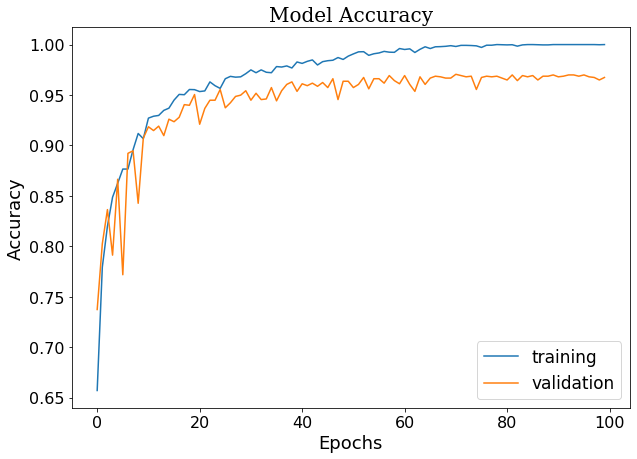

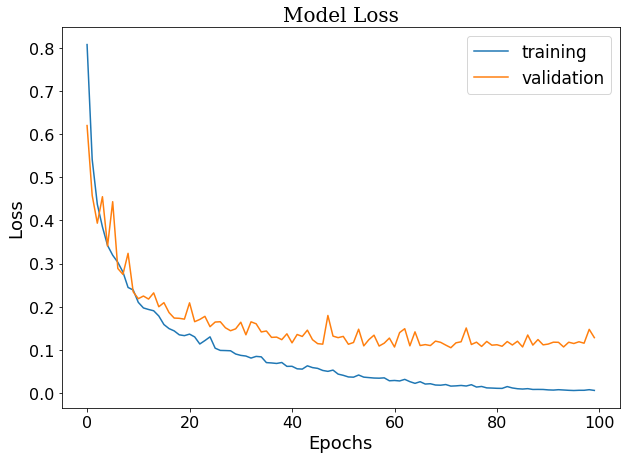

In [0]:
plt.figure(figsize=(10, 7))
plt.plot(lr_8['acc'], label = 'training')
plt.plot(lr_8['val_acc'], label = 'validation')
plt.title("Model Accuracy", family = 'serif', size = 20, weight = 'normal')
plt.xlabel("Epochs", family = 'sans-serif', size = 18)
plt.ylabel("Accuracy", family = 'sans-serif', size = 18)
plt.xticks(family = 'sans-serif', size = 16)
plt.yticks(family = 'sans-serif', size = 16)
plt.legend(loc='bottom left', ncol=1, prop={'size': 17}) 
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(lr_8['loss'],  label = 'training')
plt.plot(lr_8['val_loss'],  label = 'validation')
plt.title("Model Loss", family = 'serif', size = 20, weight = 'normal')
plt.xlabel("Epochs", family = 'sans-serif', size = 18)
plt.ylabel("Loss", family = 'sans-serif', size = 18)
plt.xticks(family = 'sans-serif', size = 16)
plt.yticks(family = 'sans-serif', size = 16)
plt.legend(loc='top right',  ncol=1, prop={'size': 17})
plt.show() 

In [0]:
df = pd.DataFrame()

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

[Text(0, 0, 'Precision'),
 Text(0, 0, 'Recall'),
 Text(0, 0, 'F1-score'),
 Text(0, 0, 'Test-acc')]

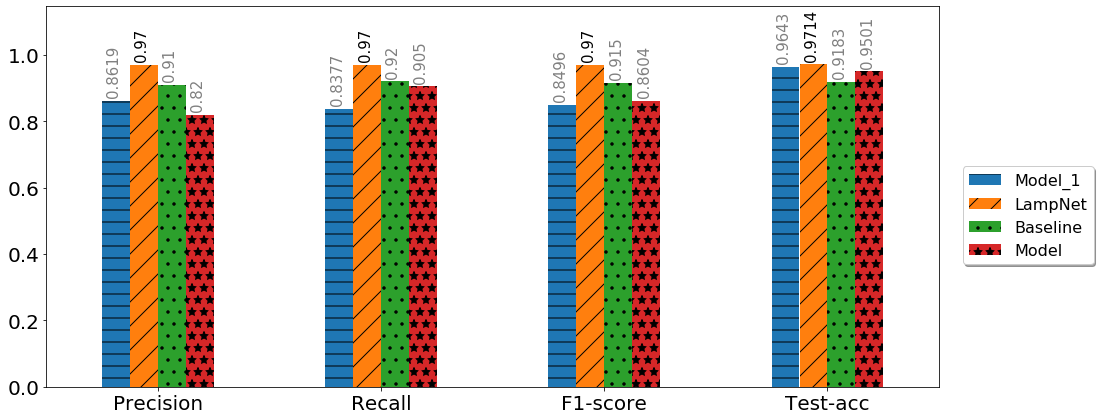

In [5]:
import seaborn as sns 
df = pd.DataFrame()
df['Model_1'] = [0.8619,  0.8377, 0.8496, 0.9643]
df['LampNet'] = [0.9700, 0.9700, 0.9700, 0.9714]
df['Baseline'] = [0.9100, 0.9200, 0.9150, 0.9183]
df['Model'] = [0.8200, 0.9050, 0.8604, 0.9501]

#     plt.figure(figsize=(10,10))
#     ax = plt.subplot(111)
ax = plt.figure(figsize=(16, 7)).add_subplot(111)
plt.margins(0.18)
df.plot(ax=ax, kind='bar', width=0.5, legend=False, fontsize=20)
bars = ax.patches
hatches = ''.join(h*len(df) for h in '-/.*')
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

for p in ax.patches:
  if p.get_height() in [0.9700, 0.9700, 0.9700, 0.9714]:
    ax.annotate(np.round(p.get_height(),decimals=4), (p.get_x()+0.02 , p.get_height() + 0.02 ), rotation=90, size = 15, c='black')
  else:
    ax.annotate(np.round(p.get_height(),decimals=4), (p.get_x()+0.02 , p.get_height() + 0.02 ), rotation=90, size = 15, c='gray')

ax.legend(loc='upper center', bbox_to_anchor=(1.1, 0.6), ncol=1, shadow=True, prop={'size': 16})
ax.set_xticklabels(['Precision','Recall','F1-score', 'Test-acc'], rotation=0)
# plt.title("Comparsion of Diffe")
# ax.set_xticklabels([1,2,3,4,5,6], rotation=0)